In [49]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [50]:
#importing datasets.
train_data  = pd.read_csv('G:\\Data Material\\AI Projects\\Handwritten digit recognizer\\train.csv')
test_data  = pd.read_csv('G:\\Data Material\\AI Projects\\Handwritten digit recognizer\\test.csv')
sample  = pd.read_csv('G:\\Data Material\\AI Projects\\Handwritten digit recognizer\\sample_submission.csv')

In [51]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [53]:
train_data['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [54]:
X = train_data.drop(['label'], axis=1)
y = train_data['label']

#Splitting the training data into traizning and validation data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

#Normalizing the image to [0,1] range
X_train = X_train / 255.0
X_test = X_test / 255.0

#Reshape / expands the dimensions of the images to (28, 28, 1)
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

#Converting classes to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

0


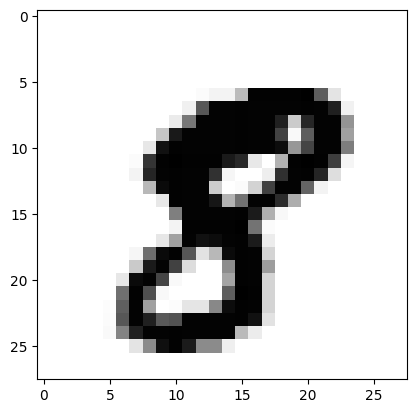

In [55]:
plt.imshow(np.array(X.loc[10]).reshape(28, 28), cmap='Greys')
print(y[4])

## Model Building

In [56]:
md = Sequential()

In [57]:
md.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), activation = 'relu'))
md.add(MaxPool2D((2, 2)))

md.add(Conv2D(64, (3,3), activation = 'relu'))
md.add(MaxPool2D((2, 2)))

md.add(Flatten())

md.add(Dropout(0.5))

md.add(Dense(10, activation='softmax'))

In [58]:
md.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

In [59]:
md.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [60]:
#Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

#EarlyStoping
es = EarlyStopping(monitor = 'val_acc', min_delta = 0.01, patience = 4, verbose = 1)

#ModelCheckPoint
check = ModelCheckpoint('./bestmodel.h5', monitor='val_acc', verbose=1, save_best_only=True)

cb = [es, check]

## Model Training

In [61]:
hist = md.fit(X_train, y_train, epochs = 50, validation_split = 0.3)

Epoch 1/50
644/644 [==============================] - 15s 21ms/step - loss: 0.3777 - accuracy: 0.8824 - val_loss: 0.1279 - val_accuracy: 0.9619
Epoch 2/50
644/644 [==============================] - 13s 20ms/step - loss: 0.1244 - accuracy: 0.9628 - val_loss: 0.0855 - val_accuracy: 0.9753
Epoch 3/50
644/644 [==============================] - 13s 20ms/step - loss: 0.0891 - accuracy: 0.9722 - val_loss: 0.0741 - val_accuracy: 0.9772
Epoch 4/50
644/644 [==============================] - 14s 21ms/step - loss: 0.0754 - accuracy: 0.9754 - val_loss: 0.0698 - val_accuracy: 0.9803
Epoch 5/50
644/644 [==============================] - 13s 21ms/step - loss: 0.0641 - accuracy: 0.9808 - val_loss: 0.0595 - val_accuracy: 0.9827
Epoch 6/50
644/644 [==============================] - 13s 20ms/step - loss: 0.0551 - accuracy: 0.9831 - val_loss: 0.0551 - val_accuracy: 0.9847
Epoch 7/50
644/644 [==============================] - 13s 20ms/step - loss: 0.0531 - accuracy: 0.9828 - val_loss: 0.0654 - val_accuracy:

In [73]:
md_1 = md.evaluate(X_test, y_test)

print(f"Our model Accuracy: {md_1[1]}")

394/394 [==============================] - 2s 6ms/step - loss: 0.0394 - accuracy: 0.9911
Our model Accuracy: 0.9911110997200012


In [75]:
pred = md.predict(X_train)
print(pred[0:9])

919/919 [==============================] - 6s 6ms/step
[[1.7114519e-15 1.8540050e-14 1.9656978e-09 7.8848671e-11 1.3372120e-18
  1.4271302e-18 3.5052068e-30 1.0000000e+00 1.0994773e-12 1.1292104e-12]
 [1.5863751e-15 6.0936117e-18 3.7605871e-14 5.0208260e-09 6.0342319e-07
  5.1017814e-12 5.9969367e-20 2.4571073e-10 2.4722954e-07 9.9999917e-01]
 [5.7295233e-07 9.9998844e-01 2.2660419e-08 2.0232375e-14 1.2384057e-08
  1.5180603e-10 6.6513854e-07 5.2859352e-09 1.0223370e-05 3.9295070e-13]
 [2.5454776e-23 3.9935860e-22 9.2976435e-19 3.5966262e-20 1.0000000e+00
  1.0777169e-14 4.2399409e-23 2.4794582e-13 7.3382207e-13 1.3191186e-12]
 [4.3644391e-19 1.6011811e-22 1.4758140e-15 1.0000000e+00 3.7358796e-27
  2.2405862e-12 5.7721457e-23 4.4502738e-15 1.1757281e-16 3.7267894e-13]
 [6.4685523e-08 1.2079938e-07 6.4567558e-08 1.5687275e-09 8.9117933e-08
  8.0798128e-07 9.9999774e-01 3.5064544e-16 1.0728879e-06 5.5421234e-14]
 [2.7956468e-10 1.0000000e+00 2.6373584e-08 3.1418553e-15 8.0374010e-09
  5